# Nonlinear Classification Method
First, a unility function to create the datasets and plotting function

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
n_samples=300
X, y = make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=n_samples,noise=0.3, random_state=0),
            make_circles(n_samples=n_samples,noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


def plot_classification_over_datasets(datasets,classifiers,names):
    i = 1
    for X, y in datasets:
        # preprocess dataset, split into training and test part
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='black', s=25)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6, edgecolors='black', s=25)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()
    

## Nonlinear SVM and Kernel Bandwidth gamma
Let's look at example for Tuning Parameter Selection for SVM, gamma parameter

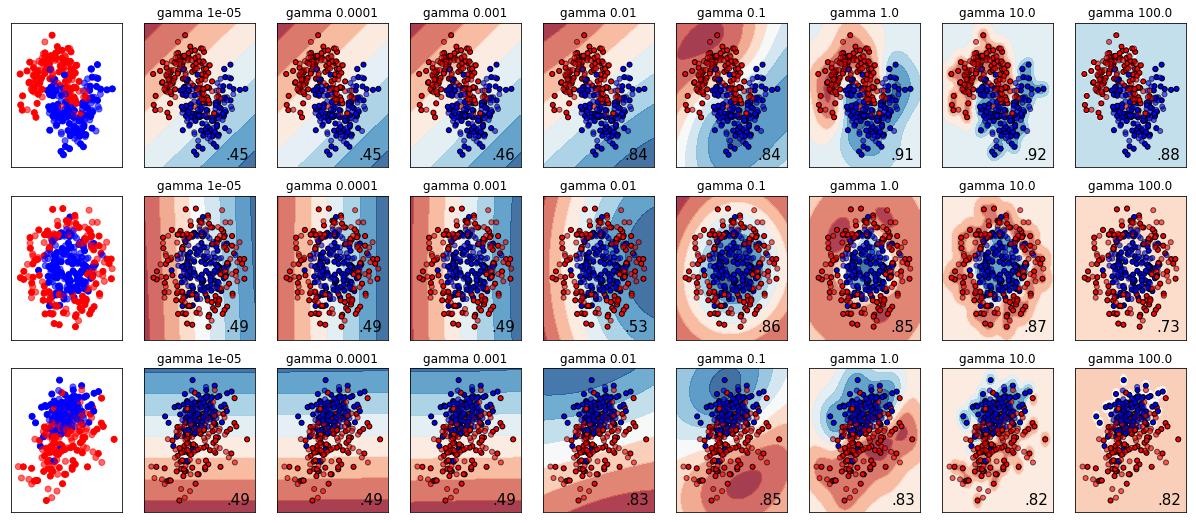

In [2]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
h = .02  # step size in the mesh

gammas = np.logspace(-5, 2, 8)
names = []
for i in gammas:
    names.append('gamma ' + str(i))

classifiers = []
for i in gammas:
    classifiers.append( SVC(kernel="rbf",gamma=i, C=1))


figure = plt.figure(figsize=(17, 9))
# iterate over datasets
plot_classification_over_datasets(datasets,classifiers,names)

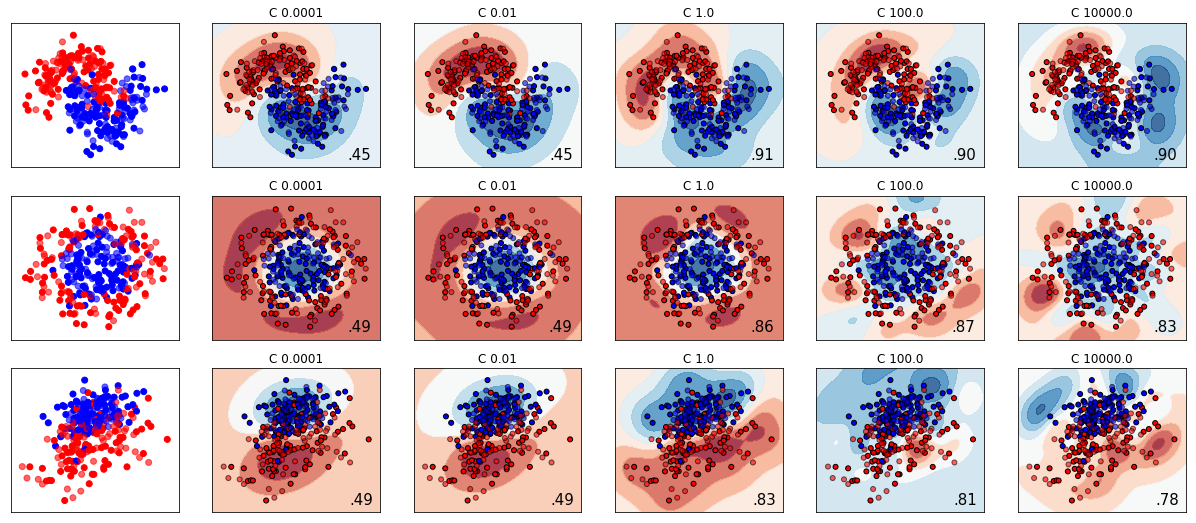

In [3]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
h = .02  # step size in the mesh

Cs = np.logspace(-4, 4, 5)
names = []
for i in Cs:
    names.append('C ' + str(i))

classifiers = []
for i in Cs:
    classifiers.append( SVC(kernel="rbf",gamma=0.91, C=i))


figure = plt.figure(figsize=(17, 9))
# iterate over datasets
plot_classification_over_datasets(datasets,classifiers,names)



## Which parameters are the best? Use GridSearchCV

In [5]:
from sklearn.model_selection import GridSearchCV
gammas=[0.00001,0.001,0.01,0.1,1,10,100]
Cs = [0.01,0.1,1,10,100,1000]
parameters = {'gamma':gammas, 'C':Cs}

for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
    svc = SVC()
    clf = GridSearchCV(svc, parameters,return_train_score=True)
    clf.fit(X_train, y_train)
    print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
    
    


best parameters: {'C': 100, 'gamma': 1} ,testing accuracy: 0.9
best parameters: {'C': 10, 'gamma': 1} ,testing accuracy: 0.875
best parameters: {'C': 100, 'gamma': 0.001} ,testing accuracy: 0.841666666667


# Random Forest 

## Influence of depth of trees

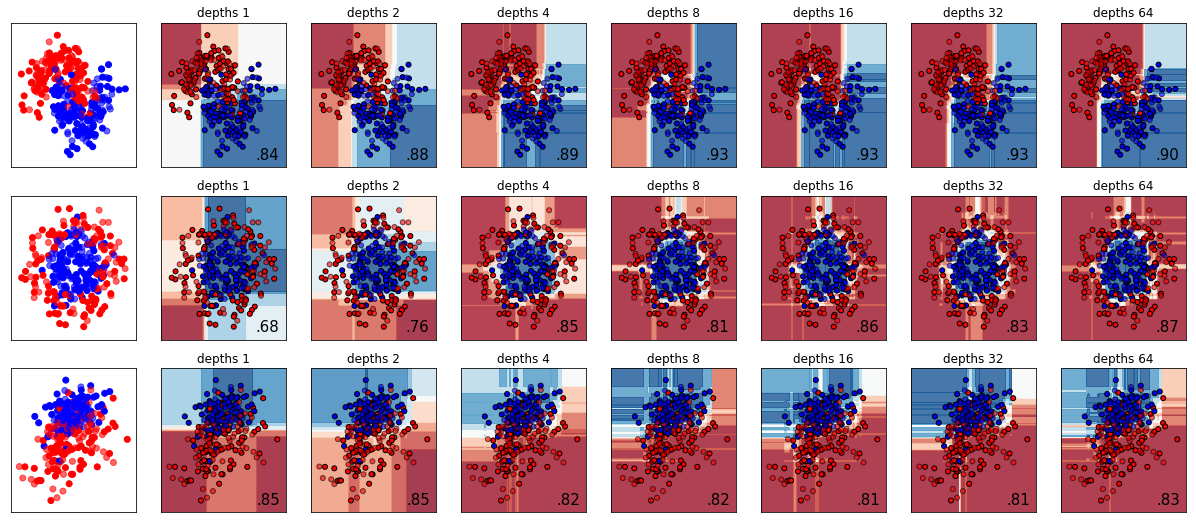

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.ensemble import RandomForestClassifier
h = .02  # step size in the mesh

depthsi = [1,2,4,8,16,32,64]
names = []
for i in depthsi:
    names.append('depths ' + str(i))

classifiers = []
for i in depthsi:
    classifiers.append( RandomForestClassifier(max_depth=i, n_estimators=20, max_features=1))


figure = plt.figure(figsize=(17, 9))
# iterate over datasets
plot_classification_over_datasets(datasets,classifiers,names)

## Influence of number of estimators

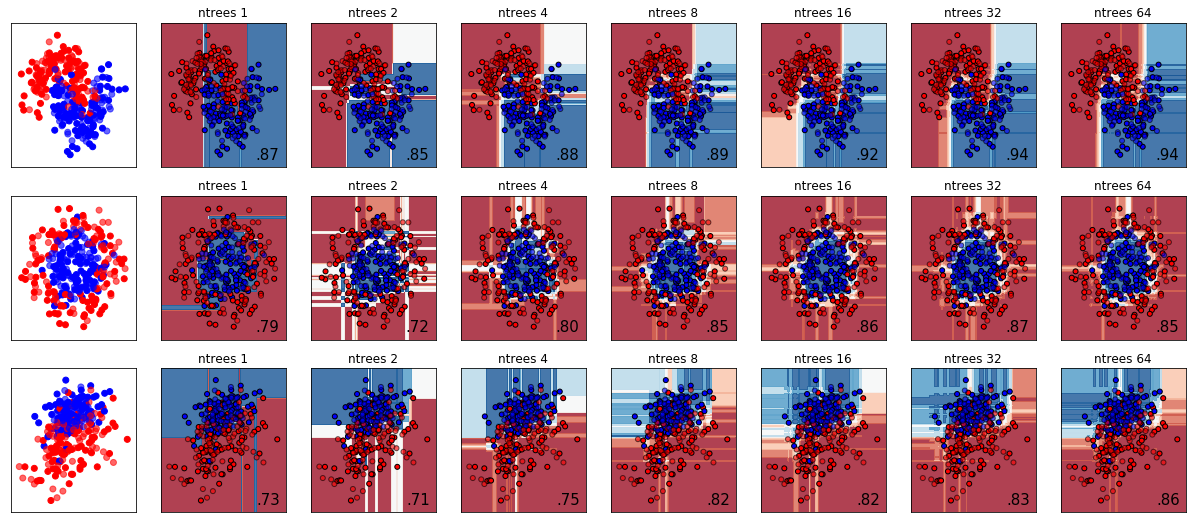

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

h = .02  # step size in the mesh

ntrees = [1,2,4,8,16,32,64]
names = []
for i in ntrees:
    names.append('ntrees ' + str(i))

classifiers = []
for i in ntrees:
    classifiers.append( RandomForestClassifier(max_depth=10, n_estimators=i, max_features=1))


figure = plt.figure(figsize=(17, 9))
# iterate over datasets
plot_classification_over_datasets(datasets,classifiers,names)

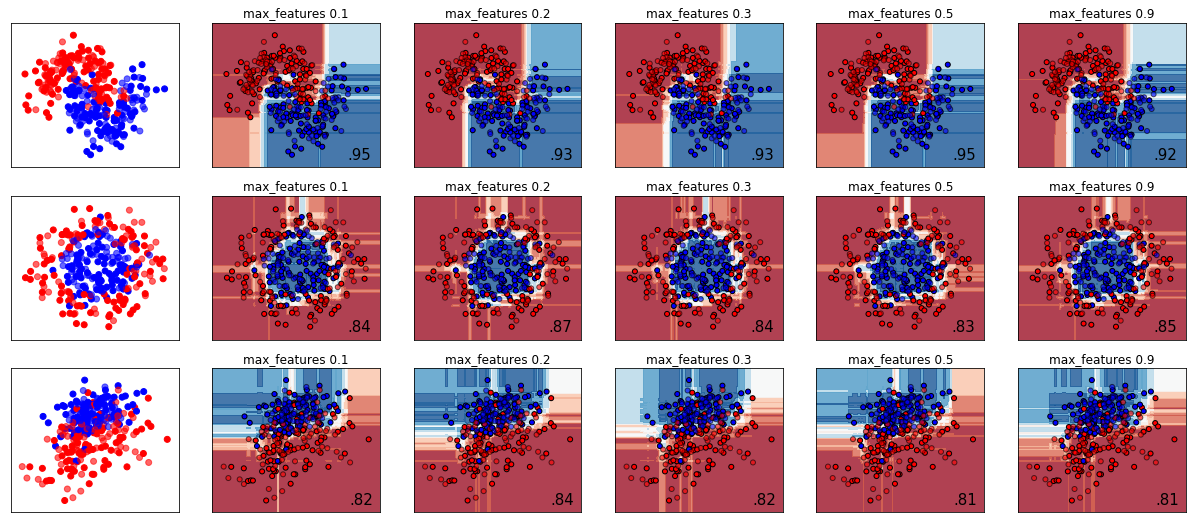

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

h = .02  # step size in the mesh

max_features = [0.1,0.2,0.3,0.5,0.9]
names = []
for i in max_features:
    names.append('max_features ' + str(i))

classifiers = []
for i in max_features:
    classifiers.append( RandomForestClassifier(max_depth=10, n_estimators=40, max_features=i))


figure = plt.figure(figsize=(17, 9))
# iterate over datasets
plot_classification_over_datasets(datasets,classifiers,names)

## Feature importances matrix in Random Forest

The first 2 datasets, x and y are equally important
The third data set is horizontal, which makes the 2nd variable y  more important than x

In [9]:
max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]
parameters = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features}


for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    model =  RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1)
    clf = GridSearchCV(model, parameters,return_train_score=True)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    clf.fit(X_train, y_train)
    print('Accuracy:{},Best parameters:{}, feature importance:{}'.format(score,clf.best_params_,clf.best_estimator_.feature_importances_))

Accuracy:0.9166666666666666,Best parameters:{'max_depth': 16, 'max_features': 0.2, 'n_estimators': 8}, feature importance:[ 0.5209927  0.4790073]
Accuracy:0.875,Best parameters:{'max_depth': 4, 'max_features': 0.2, 'n_estimators': 32}, feature importance:[ 0.54327157  0.45672843]
Accuracy:0.8166666666666667,Best parameters:{'max_depth': 16, 'max_features': 0.2, 'n_estimators': 32}, feature importance:[ 0.2634963  0.7365037]


## XGBoost

## Tuning Parameter selection and Feature Importance matrix in XGBoost

Tuning the parameters correctly is very important for XGboost. We did a two-step search to save computational time via GridSearchCV

In [10]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    gsearch1.fit(X_train, y_train)
    score = gsearch1.score(X_test, y_test)
    gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=gsearch1.best_params_['max_depth'], min_child_weight=gsearch1.best_params_['min_child_weight'], gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),  param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
    gsearch2.fit(X_train, y_train)
    score = gsearch2.score(X_test, y_test)    
    print('Accuracy:{}, feature importance:{}'.format(score,gsearch2.best_estimator_.feature_importances_))

NameError: name 'XGBClassifier' is not defined